## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.merge(study_results, left_on='Mouse ID', right_on='Mouse ID')

# Display the data table for preview
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

study_results.duplicated(subset=["Mouse ID" ,"Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = study_results[study_results.duplicated(subset=['Mouse ID']) == True]
print(duplicate_data)
            


     Mouse ID  Timepoint  Tumour Volume (mm3)  Metastatic Sites
137      g989          0            45.000000                 0
250      a275          5            46.795257                 0
251      w575          5            48.913860                 1
252      x822          5            45.671104                 1
253      l509          5            45.851193                 0
...       ...        ...                  ...               ...
1888     r944         45            41.581521                 2
1889     u364         45            31.023923                 3
1890     p438         45            61.433892                 1
1891     x773         45            58.634971                 4
1892     b879         45            72.555239                 2

[1644 rows x 4 columns]


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=study_results.drop_duplicates(subset=['Mouse ID'])
clean_data

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
...,...,...,...,...
245,t565,0,45.0,0
246,i557,0,45.0,0
247,m957,0,45.0,0
248,f966,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen.study_results.
summary_table=pd.DataFrame({"mean":pd.Series(clean_data['Tumour Volume (mm3)'].mean()),
                           "median":pd.Series(clean_data['Tumour Volume (mm3)'].median()),
                           "variance":pd.Series(clean_data['Tumour Volume (mm3)'].var()),
                            "std":pd.Series(clean_data['Tumour Volume (mm3)'].std()),
                            "sem":pd.Series(clean_data['Tumour Volume (mm3)'].sem())})
summary_table
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 

print(mouse_metadata.groupby(by=["Drug Regimen"]).mean())
print(mouse_metadata.groupby(by=["Drug Regimen"]).median())
print(mouse_metadata.groupby(by=["Drug Regimen"]).var())
print(mouse_metadata.groupby(by=["Drug Regimen"]).std())
print(mouse_metadata.groupby(by=["Drug Regimen"]).sem())

# Assemble the resulting series into a single summary dataframe.



              Age_months  Weight (g)
Drug Regimen                        
Capomulin         14.040      20.120
Ceftamin          12.800      27.400
Infubinol         16.400      27.320
Ketapril          14.720      28.080
Naftisol          12.240      27.240
Placebo           10.680      28.040
Propriva           9.880      27.240
Ramicane          10.840      20.000
Stelasyn          13.125      27.875
Zoniferol         12.600      27.920
              Age_months  Weight (g)
Drug Regimen                        
Capomulin           17.0        21.0
Ceftamin            12.0        28.0
Infubinol           19.0        27.0
Ketapril            17.0        29.0
Naftisol            12.0        27.0
Placebo             10.0        28.0
Propriva             7.0        27.0
Ramicane             9.0        19.0
Stelasyn            14.0        28.0
Zoniferol           12.0        28.0
              Age_months  Weight (g)
Drug Regimen                        
Capomulin      61.623333    8.193333
C

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

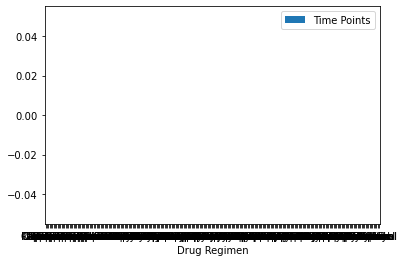

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df = pd.DataFrame({'Drug Regimen':mouse_metadata['Drug Regimen'], 'Time Points':clean_data['Timepoint']})
ax = df.plot.bar(x='Drug Regimen', y='Time Points', rot=0)


In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [2]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [3]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [4]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [5]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [6]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [7]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [8]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
